In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

# Problema: Dataset de pingüinos 🐧🐧

Carga el dataset y responde las siguientes preguntas:

Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

In [235]:
# Cargar el dataset
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



## Primera aproximación a los datos de forma general y su limpieza:


###1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [236]:
species_names = df.value_counts("species")
print("Species: ", species_names, "\n")
column_names = df.columns
print("Characteristics: ", column_names)

Species:  species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64 

Characteristics:  Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


En el dataset hay presentes 3 especies de pingüinos: Adelia (Adélie), Papúa (Gentoo) y Barbijo (Chinstrap).

Las 8 características que se dan sobre estos son: Especie, Isla, Largo y profundidad de su pico, largo de sus aletas, masa y sexo.

### 2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [237]:
print(df.isnull().sum())
df = df.dropna()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Sí, hay 19 valores faltantes en el dataset, al ser estos pocos datos comparados al tamaño del dataset, como estrategia de limpieza simplemente se borran las columnas donde faltan datos.

### 3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [238]:
island_count = df.value_counts("island")
print(island_count)

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64


La isla con mayor número de pingüinos es la isla *Biscoe*, y se presesnta un claro desbalance, 2 de las islas tienen poblaciones grandes y similares, en comparación a la isla *Torsegen*, que tiene una población de solo 47 pingüinos

### 4. Repita la pregunta anterior observando las especies.


In [239]:
island_group = df.groupby(["island", "species"])
island_group.size()

island     species  
Biscoe     Adelie        44
           Gentoo       119
Dream      Adelie        55
           Chinstrap     68
Torgersen  Adelie        47
dtype: int64

En las 3 islas hay pingüinos *Adélie*, y su población es similar en las 3, presentando mayor cantidad en la isla *Dream*, con 55 especimenes, mientras que en los pingüinos *Gentoo* solo tienen población en la isla *Biscoe*, y los *Chinstrap* en la isla *Torgersen*.

## Tendencias y visualizacion de las variables


###5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [240]:
species_group = df.groupby("species")
species_group["bill_length_mm"].agg(["mean", "std"])

,mean,std
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


###6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [241]:
max_length_index = df["bill_length_mm"].idxmax()
df.loc[max_length_index]

,253
species,Gentoo
island,Biscoe
bill_length_mm,59.6
bill_depth_mm,17.0
flipper_length_mm,230.0
body_mass_g,6050.0
sex,Male


El pico más largo del dataset lo tiene un pingüino *Gentoo*, con un pico de 59.6mm de largo

###7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

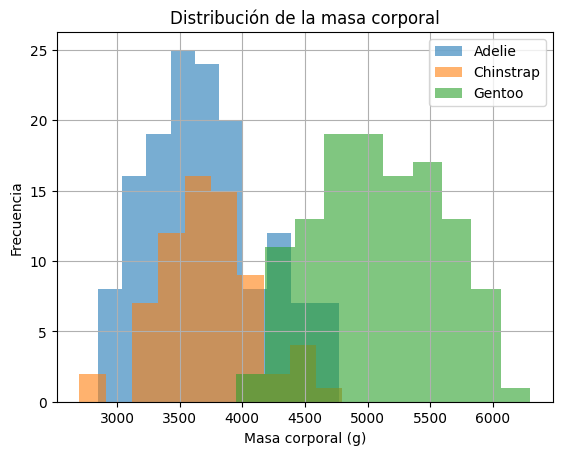

In [242]:
species_group["body_mass_g"].hist(alpha=0.6)
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la masa corporal")
plt.legend(["Adelie", "Chinstrap", "Gentoo"])
plt.show()

Los pingüinos *Chinstrap* y los *Adélie* son los más livianos, con masas distribuidas mayormente entre los 3000 y 4500 gramos, mientras que los *Gentoo* son mucho más pesados, con sus masas entre los 4000 y los 6000 gramos

###8. Describa la distribucion con ayuda de la media, desviacion estandard

In [243]:
species_group["body_mass_g"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


* En promedio, los *Gentoo* son los pingüinos más pesados, mientras que los *Adelie* serían los más livianos por unos pocos gramos en comparación con los *Chinstrap*

* La desviación estandar indica que los *Chinstrap* son los que tienen la distribución más homogénea de masa corporal

* El menor peso lo presenta un *Adelie* con un peso de 4775g, y el mayor lo presenta un *Gentoo* con un peso de 6300g

###9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?


In [244]:
df.groupby("sex")["body_mass_g"].agg(["std", "mean"])

,std,mean
sex,,
Female,666.172050,3862.272727
Male,787.628884,4545.684524


En promedio, los pingüinos hembras en promedio tienen un peso 683.411797g menor que los pingüinos machos, y presentan mayor homogéniedad en esta característica

###10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [245]:
species_group["flipper_length_mm"].agg(["mean", "std"])

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


###11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?


In [246]:
flipper_index = df["flipper_length_mm"].agg(["idxmin", "idxmax"])
df.loc[flipper_index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,Female
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male


La aleta más corta la tiene un pingüino *Adelie* con una aleta de 172mm, y la más larga la tiene un *Gentoo* con una aleta de 231mm

###12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [247]:
df.groupby(["island", "species"])["bill_length_mm"].agg(["mean", "std"])

mean       std
island    species                       
Biscoe    Adelie     38.975000  2.480916
          Gentoo     47.568067  3.106116
Dream     Adelie     38.520000  2.484276
          Chinstrap  48.833824  3.339256
Torgersen Adelie     39.038298  3.028097

* En la isla *Biscoe*, los pingüinos con los picos más largos, en promedio, son los *Gentoo*

* En la isla *Dream* son los *chinstrap* los que tienen los picos más largos

* Los pingüinos *Adélie* de la isla *Torgersen* son los pingüinos de esta especie que presentan los picos más largos

###13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [248]:
df.groupby("island")["bill_length_mm"].agg(["mean", "std"])

,mean,std
island,,
Biscoe,45.248466,4.827319
Dream,44.221951,5.947069
Torgersen,39.038298,3.028097


* La isla que presenta mayor variación en la longitud de pico es la isla *Dream*, mientras que el menor contraste está en *Torgensen*, facilmente explicado por la presencia de una sola especie de pingüino allí.

## Relación entre caracteristicas de los pingüinos

###14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.


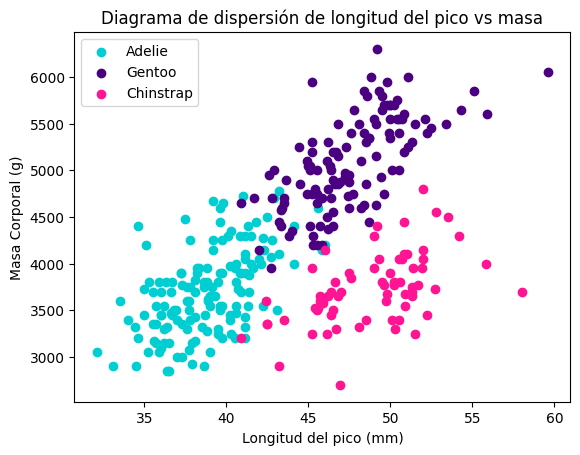

In [249]:
plt.scatter(x=df[df["species"] == "Adelie"] ["bill_length_mm"], y=df[df["species"] == "Adelie"]["body_mass_g"], c="darkturquoise")
plt.scatter(x=df[df["species"] == "Gentoo"] ["bill_length_mm"], y=df[df["species"] == "Gentoo"]["body_mass_g"], c="indigo")
plt.scatter(x=df[df["species"] == "Chinstrap"] ["bill_length_mm"], y=df[df["species"] == "Chinstrap"]["body_mass_g"], c="deeppink")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa Corporal (g)")
plt.legend(["Adelie", "Gentoo", "Chinstrap"])
plt.title("Diagrama de dispersión de longitud del pico vs masa")
plt.show()

Se puede observar claramente la relación positiva entre estas características, tanto en general, como para cada especie, cada especie presentando diferentes niveles de relación.

###15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?


In [250]:
print(df["bill_length_mm"].corr(df["body_mass_g"]))
print(species_group["bill_length_mm"].corr(df["body_mass_g"]))

0.589451110176949
species
Adelie       0.544276
Chinstrap    0.513638
Gentoo       0.666730
Name: bill_length_mm, dtype: float64


Como se ve en los datos anteriores, las 3 especies presentan correlación positiva moderada, lo que indica que sí tienden a tener picos más largos los pingüinos más pesados.

###16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?


In [257]:
df.groupby(["sex", "species"])["flipper_length_mm"].describe()

count        mean       std    min     25%    50%     75%  \
sex    species                                                                
Female Adelie      73.0  187.794521  5.595035  172.0  185.00  188.0  191.00   
       Chinstrap   34.0  191.735294  5.754096  178.0  187.25  192.0  195.75   
       Gentoo      58.0  212.706897  3.897856  203.0  210.00  212.0  215.00   
Male   Adelie      73.0  192.410959  6.599317  178.0  189.00  193.0  197.00   
       Chinstrap   34.0  199.911765  5.976558  187.0  196.00  200.5  203.00   
       Gentoo      61.0  221.540984  5.673252  208.0  218.00  221.0  225.00   

                    max  
sex    species           
Female Adelie     202.0  
       Chinstrap  202.0  
       Gentoo     222.0  
Male   Adelie     210.0  
       Chinstrap  212.0  
       Gentoo     231.0

En las 3 especies de pingüinos, las hembras tienen en promedio aletas más cortas que los machos. Las desviaciones estandar son bajas, lo que implica que la relación es consistente. En general, decimos que sí, la longitud de las aletas sí está asociada con el sexo.

## Test de hipótesis


###17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

In [252]:
male_bill = df[df["sex"] == "Male"]["bill_length_mm"]
female_bill = df[df["sex"] == "Female"]["bill_length_mm"]
male_mean = male_bill.mean()
female_mean = female_bill.mean()

print("Media macho: ", male_mean)
print("Media hembra: ", female_mean)

Media macho:  45.85476190476191
Media hembra:  42.096969696969694


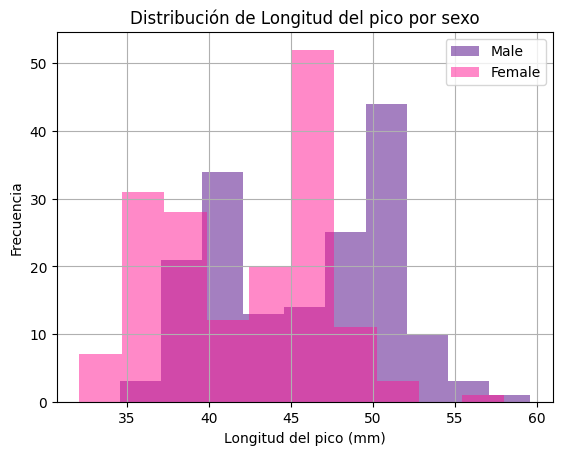

In [253]:
df[df["sex"]=="Male"]["bill_length_mm"].hist(alpha=0.5, label="Male", color = "indigo")
df[df["sex"]=="Female"]["bill_length_mm"].hist(alpha=0.5, label="Female", color="deeppink")
plt.title("Distribución de Longitud del pico por sexo")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

****

**Hipotesis nula**: En la población, la distribución de las masas corporales de los pingüinos es la misma para los machos que para las hembras. La diferencia en la muestra se debe al azar.

**Hipotesis alternativa**: En la población, los pingüinos hembra tienen masa corporal más baja, en promedio, que los pingüinos macho

In [254]:
#Code mostly modified from "Sesion_01c_PruebasH_V2.ipynb"

length_bill = df[["sex", "bill_length_mm"]]

observed_difference = male_mean - female_mean
print("Diferencia observada: ", observed_difference)

#We define a function to calculate the difference of means for a given grouping
def mean_differences(df, group_label):
  means = df.groupby(group_label)["bill_length_mm"].mean().values
  return means[1] - means[0]

#We define a function that randomizes the sex for the df
def diferentes_muestras():
  shuffled_labels = length_bill["sex"].sample(frac=1, replace=False).reset_index(drop=True)
  shuffled_df = length_bill.copy().reset_index(drop=True)
  shuffled_df["Shuffled"] = shuffled_labels
  #We create a column where it's checked if the sex was changed or not
  shuffled_df["Changed"] = shuffled_df["sex"] != shuffled_df["Shuffled"]
  #We calculate mean differences only over the shuffled bill lengths
  shuffled_only = shuffled_df[["bill_length_mm", "Changed"]]
  return mean_differences(shuffled_only, "Changed")

Diferencia observada:  3.757792207792214


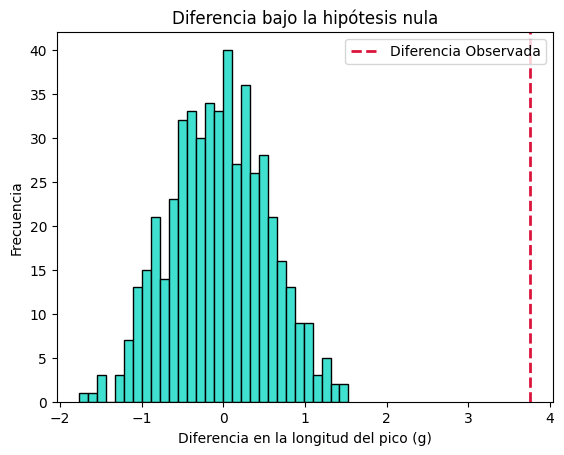

Diferencia Observada: 3.757792207792214


In [255]:
diferencias = []

#We run repetitions for the shuffled set
repetitions = 500
for _ in range(repetitions):
  diferencias.append(diferentes_muestras())

diferencias_df = pd.DataFrame({"Diferencia": diferencias})

# We graph the histogram of the shuffled differences + add the observed (real) difference.
plt.hist(diferencias_df["Diferencia"], bins=30, edgecolor='black', color='turquoise')
plt.axvline(observed_difference, color='crimson', linestyle='dashed', linewidth=2, label="Diferencia Observada")
plt.title("Diferencia bajo la hipótesis nula")
plt.xlabel("Diferencia en la longitud del pico (g)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Mostrar la diferencia observada
print("Diferencia Observada:", observed_difference)

Así, se observa que la diferencia real entre sexos está lejos de lo que se esperaría por azar, entonces rechazamos la hipotesis nula. Por lo tanto sí existe correlación entre el sexo del pingüino y la longitud de su pico